In [1]:
import requests
page = requests.get("https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168#.Xcr7NVdKjIX")
page

<Response [200]>

In [2]:
from bs4 import BeautifulSoup as bs
soup = bs(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <!-- Meta -->
  <meta content="width=device-width" name="viewport"/>
  <link href="http://purl.org/dc/elements/1.1/" rel="schema.DC"/>
  <title>
   National Weather Service
  </title>
  <meta content="National Weather Service" name="DC.title">
   <meta content="NOAA National Weather Service National Weather Service" name="DC.description"/>
   <meta content="US Department of Commerce, NOAA, National Weather Service" name="DC.creator"/>
   <meta content="" name="DC.date.created" scheme="ISO8601"/>
   <meta content="EN-US" name="DC.language" scheme="DCTERMS.RFC1766"/>
   <meta content="weather, National Weather Service" name="DC.keywords"/>
   <meta content="NOAA's National Weather Service" name="DC.publisher"/>
   <meta content="National Weather Service" name="DC.contributor"/>
   <meta content="http://www.weather.gov/disclaimer.php" name="DC.rights"/>
   <meta content="General" name="rating"/>
   <meta content="index,follow" name="robots"/>

In [3]:
#The description of the conditions

soup.select('#seven-day-forecast-body')

y = soup.select('.row-forecast .forecast-text')


def descriptions(y):
    j = []
    for i in y:
        i = i.text
        j.append(i)
    return j
    
    
desc = descriptions(y)
desc


['Partly sunny, with a high near 71. Light and variable wind becoming west around 5 mph in the afternoon. ',
 'Increasing clouds, with a low around 54. West southwest wind around 6 mph. ',
 'Mostly cloudy, with a high near 68. Calm wind becoming west southwest around 6 mph in the afternoon. ',
 'Cloudy, with a low around 54. Southwest wind 7 to 9 mph. ',
 'Mostly cloudy, with a high near 63. South southwest wind 6 to 8 mph. ',
 'Mostly cloudy, with a low around 52.',
 'Mostly sunny, with a high near 66.',
 'Partly cloudy, with a low around 52.',
 'Sunny, with a high near 69.',
 'Mostly clear, with a low around 52.',
 'Sunny, with a high near 71.',
 'Mostly clear, with a low around 53.',
 'Sunny, with a high near 70.']

In [4]:
#The name of the forecast item

x = soup.select('.row-forecast .forecast-label')

def items(x):
    j = []
    for i in x:
        i = i.text
        j.append(i)
    return j
    
new_items = items(x)


In [5]:
#A short description of the conditions

w = soup.select('.forecast-tombstone .short-desc')

def short_d(w):
    j = []
    for i in w:
        i = i.text
        j.append(i)
    return j

new_short = short_d(w)


In [15]:
#tempereature

o = soup.select('.forecast-tombstone .temp')

def temp_(o):
    j = []
    for i in o:
        i = i.text
        j.append(i)
    return j
    
temp = temp_(o)
temp


['High: 71 °F',
 'Low: 54 °F',
 'High: 68 °F',
 'Low: 54 °F',
 'High: 63 °F',
 'Low: 52 °F',
 'High: 66 °F',
 'Low: 52 °F',
 'High: 69 °F']

In [32]:
o = soup.select('.forecast-tombstone .temp')

def temp_2(o):
    j = []
    for i in o:
        i = i.text
        i.replace('High: ',"")
        j.append(i)
    return j


    
temp2 = temp_2(o)
temp2

temp3 = [x.replace('High: ', '') for x in temp2] 
temp3


['71 °F',
 'Low: 54 °F',
 '68 °F',
 'Low: 54 °F',
 '63 °F',
 'Low: 52 °F',
 '66 °F',
 'Low: 52 °F',
 '69 °F']

In [74]:
import re

temp4 = [int(re.compile('\d+').search(x)[0]) for x in temp2]
temp4




[71, 54, 68, 54, 63, 52, 66, 52, 69]

In [39]:
#Save all of this into a Pandas dataframe
#temp, new_short,new_items, desc
import pandas as pd


In [75]:
data = [new_items, desc, new_short, temp4]

df = pd.DataFrame(data).T
df

,0,1,2,3
0,Today,"Partly sunny, with a high near 71. Light and v...",Partly Sunny,71
1,Tonight,"Increasing clouds, with a low around 54. West ...",IncreasingClouds,54
2,Wednesday,"Mostly cloudy, with a high near 68. Calm wind ...",Mostly Cloudy,68
3,Wednesday Night,"Cloudy, with a low around 54. Southwest wind 7...",Cloudy,54
4,Thursday,"Mostly cloudy, with a high near 63. South sout...",Mostly Cloudy,63
5,Thursday Night,"Mostly cloudy, with a low around 52.",Mostly Cloudy,52
6,Friday,"Mostly sunny, with a high near 66.",Mostly Sunny,66
7,Friday Night,"Partly cloudy, with a low around 52.",Partly Cloudy,52
8,Saturday,"Sunny, with a high near 69.",Sunny,69
9,Saturday Night,"Mostly clear, with a low around 52.",None,None


In [76]:
#Bonus: Do a plot of the ﬂuctuation of the data
import matplotlib.pyplot as plt
import numpy as np

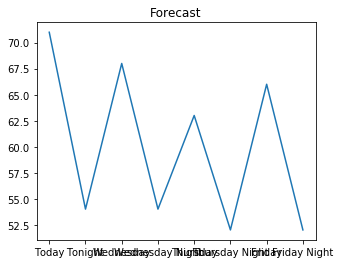

In [77]:
fig = plt.figure(figsize=(5,4))
az = fig.add_subplot(1,1,1,title = "Forecast")
plt.plot(df[:8][0],df[:8][3])

